<a href="https://colab.research.google.com/github/paulopetrillo/PROJETO_IFMA_SOFTEX/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importa a biblioteca numpy
import numpy as np
print(np.__version__)

1.25.2


In [2]:
# importa biblioteca Pandas.
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
pip install xgboost

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# pacotes para regressão logistica
#from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# # Grava datDataFrame_Geral em Googe drive
# #drive.mount('/content/drive')
# DataFrame_Geral.to_csv('./drive/MyDrive/DataFrame_Geral.csv')
# DataFrame_Geral= pd.read_csv("./drive/MyDrive/Colab Notebooks/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral = pd.read_csv("./drive/MyDrive/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [8]:
DataFrame_XGBoost = DataFrame_Geral.copy()
DataFrame_XGBoost

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [9]:
# Apaga colunas desnecessarias para o treinamento.
DataFrame_XGBoost.drop(['mandante',
                             'golsMand',
                             'golsVist',
                             'vistante',
                             'Unnamed: 0'], axis=1, inplace=True)
DataFrame_XGBoost

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,9,6,8,5,1
1,12,0,7,4,1
2,6,11,9,12,0
3,8,5,5,4,2
4,14,7,6,6,2
...,...,...,...,...,...
2535,6,1,5,6,1
2536,6,3,4,6,0
2537,8,1,3,6,1
2538,4,3,1,9,1


In [10]:
# Definir as variáveis ​​preditoras e de resposta
features = DataFrame_XGBoost[['poder_ataque_time_mandante',
                                   'poder_ataque_time_visitante',
                                   'poder_defesa_time_mandante',
                                   'poder_defesa_time_visitante']]
target = DataFrame_XGBoost['classe_resultado']

In [11]:
# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

In [12]:
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# Criar e treinar o modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax',
                          num_class=3,
                          random_state=42)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [14]:
# Fazer previsões no conjunto de teste
y_pred = XGB_model.predict(X_test)

In [15]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Acurácia do modelo:')
print(accuracy)
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % XGB_model.score(X_train, y_train))
print("Acurácia do teste: %f" % XGB_model.score(X_test, y_test))

Acurácia do modelo:
0.41732283464566927
Matriz de Confusão:
[[ 22 108  32]
 [ 60 213  52]
 [ 28  90  30]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.14      0.16       162
           1       0.52      0.66      0.58       325
           2       0.26      0.20      0.23       148

    accuracy                           0.42       635
   macro avg       0.33      0.33      0.32       635
weighted avg       0.38      0.42      0.39       635

Acurácia do treinamento: 0.780577
Acurácia do teste: 0.417323


In [16]:
import pickle

# Salva o modelo
with open('XGB_model.pkl', 'wb') as f:
    pickle.dump(XGB_model, f)

In [17]:
# Carregue o modelo
with open('XGB_model.pkl', 'rb') as f:
    XGB_model_loaded = pickle.load(f)

In [18]:
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Modelo XGBoost')

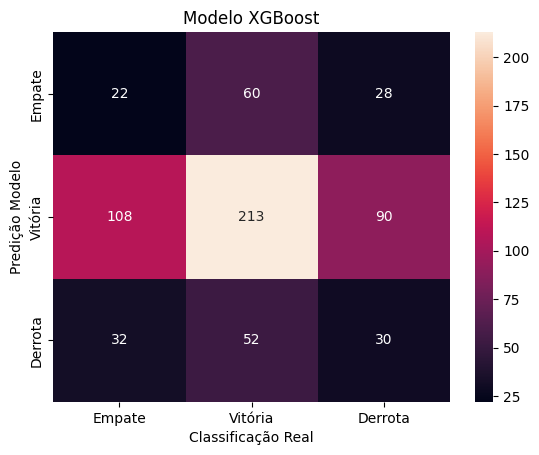

In [19]:
#imprimir a Matriz de Confusão para XGBoost
XGB_model_pred = XGB_model_loaded.predict(X_test)

XGB_model_cm = metrics.confusion_matrix(XGB_model_pred, y_test)

sns.heatmap(XGB_model_cm,
            annot=True,
            fmt='.0f',
            xticklabels = ["Empate", "Vitória", "Derrota"] ,
            yticklabels = ["Empate", "Vitória", "Derrota"]
            )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo XGBoost')

In [21]:
#type(mlp_cm)
type(XGB_model_cm)

numpy.ndarray

In [22]:
#mlp_cm
confusion_matrix = XGB_model_cm
confusion_matrix

array([[ 22,  60,  28],
       [108, 213,  90],
       [ 32,  52,  30]])

In [24]:
# Cálculo da precisão por classe
precision_classes = []
for i in range(3):
    precision_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]))

# Impressão dos resultados
print("Precisão por classe:")
print(f"Empate : {precision_classes[0]:.4f}")
print(f"Vitória: {precision_classes[1]:.4f}")
print(f"Derrota: {precision_classes[2]:.4f}")

# f"Valor: {valor:.4f}"

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.

Precisão por classe:
Empate : 0.1358
Vitória: 0.6554
Derrota: 0.2027
Precisão geral: 0.41732283464566927


In [25]:
# Cálculo do recall por classe
recall_classes = []
for i in range(3):
    recall_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]))

# Impressão dos resultados
print("Recall por classe:")
print(f"Empate : {recall_classes[0]:.4f}")
print(f"Vitória: {recall_classes[1]:.4f}")
print(f"Derrota: {recall_classes[2]:.4f}")

#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.

Recall por classe:
Empate : 0.2000
Vitória: 0.5182
Derrota: 0.2632


In [26]:
# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

Acurácia: 0.41732283464566927


In [27]:
# Cálculo do F1-score por classe
f1_classes = []
for i in range(3):
    precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
    recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
    f1_classes.append(2 * (precision * recall) / (precision + recall))

# Impressão dos resultados
print("F1-score por classe:")
print(f"Empate : {f1_classes[0]:.4f}")
print(f"Vitória: {f1_classes[1]:.4f}")
print(f"Derrota: {f1_classes[2]:.4f}")

# Cálculo do F1-score geral
f1_geral = np.mean(f1_classes)

# Impressão do resultado
print("F1-score geral:", f1_geral)

# F1-score = 2 * (Precisão * Recall) / (Precisão + Recall)
# O F1-score é uma métrica que combina precisão e recall em uma única medida,
# sendo útil para avaliar o desempenho do modelo em problemas de classificação
# com múltiplas classes.

F1-score por classe:
Empate : 0.1618
Vitória: 0.5788
Derrota: 0.2290
F1-score geral: 0.32319222909874207


#Balanceamento de Carga - Oversampling


In [28]:
# Verificando distribuição das variáveis target
target.value_counts()

1    1258
0     674
2     608
Name: classe_resultado, dtype: int64

In [29]:
# Biblioteca para balanceamento de carga.
from imblearn.over_sampling import SMOTE

In [30]:
##### >>>> Solucao do erro da celula abaixo Sujerida pelo Google <<<< #####
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
# label_encoder = LabelEncoder()

# Encode the target variable (target = y)
# y_encoded = label_encoder.fit_transform(target)

# Apply SMOTE to the encoded target variable (features = X)
smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(features, y_encoded)
X_resampled, y_resampled = smote.fit_resample(features, target)

In [31]:
target.value_counts()


1    1258
0     674
2     608
Name: classe_resultado, dtype: int64

In [32]:
np.unique(target)

array([0, 1, 2])

In [33]:
# Verificando distribuição das variáveis target após balancemaneto por overssample
y_df = y_resampled
y_DF = pd.DataFrame(y_df)
y_DF.value_counts()

classe_resultado
0                   1258
1                   1258
2                   1258
dtype: int64

In [34]:
# Divisão do conjunto de dados em treino e teste
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled,
                                                                    y_resampled,
                                                                 test_size=0.30,
                                                                random_state=42)

In [35]:
# Criar e treinar o modelo XGBoost
XGB_model_bal = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Treinamento do modelo
XGB_model_bal = XGB_model_bal.fit(X_train_bal, y_train_bal)

In [36]:
# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % XGB_model_bal.score(X_resampled, y_resampled))
print("Acurácia do teste: %f" % XGB_model_bal.score(X_test_bal, y_test_bal))

Acurácia do treinamento: 0.705617
Acurácia do teste: 0.498676


In [37]:
# Salva o modelo
with open('XGB_model_bal.pkl', 'wb') as f:
    pickle.dump(XGB_model_bal, f)

In [38]:
# Carregue o modelo
with open('XGB_model_bal.pkl', 'rb') as f:
    XGB_model_bal_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo XGBoost')

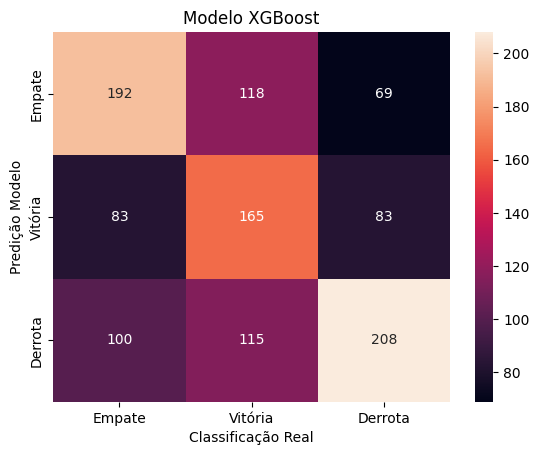

In [39]:
#imprimir a Matriz de Confusão para XGBoost
XGB_model_bal_pred = XGB_model_bal_loaded.predict(X_test_bal)

XGB_model_bal_cm = metrics.confusion_matrix(XGB_model_bal_pred, y_test_bal)

sns.heatmap(XGB_model_bal_cm,
            annot=True,
            fmt='.0f',
            xticklabels = ["Empate", "Vitória", "Derrota"] ,
            yticklabels = ["Empate", "Vitória", "Derrota"]
            )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo XGBoost')

In [40]:
#type(mlp_cm)
type(XGB_model_bal_cm)

numpy.ndarray

In [41]:
#mlp_cm
confusion_matrix = XGB_model_bal_cm
confusion_matrix

array([[192, 118,  69],
       [ 83, 165,  83],
       [100, 115, 208]])

In [42]:
# Cálculo da precisão por classe
precision_classes = []
for i in range(3):
    precision_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]))

# Impressão dos resultados
print("Precisão por classe:")
print(f"Empate : {precision_classes[0]:.4f}")
print(f"Vitória: {precision_classes[1]:.4f}")
print(f"Derrota: {precision_classes[2]:.4f}")

# f"Valor: {valor:.4f}"

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.

Precisão por classe:
Empate : 0.5120
Vitória: 0.4146
Derrota: 0.5778
Precisão geral: 0.49867608120035306


In [43]:
# Cálculo do recall por classe
recall_classes = []
for i in range(3):
    recall_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]))

# Impressão dos resultados
print("Recall por classe:")
print(f"Empate : {recall_classes[0]:.4f}")
print(f"Vitória: {recall_classes[1]:.4f}")
print(f"Derrota: {recall_classes[2]:.4f}")

#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.

Recall por classe:
Empate : 0.5066
Vitória: 0.4985
Derrota: 0.4917


In [44]:
# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

Acurácia: 0.49867608120035306


In [46]:
# Cálculo do F1-score por classe
f1_classes = []
for i in range(3):
    precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
    recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
    f1_classes.append(2 * (precision * recall) / (precision + recall))

# Impressão dos resultados
print("F1-score por classe:")
print(f"Empate : {f1_classes[0]:.4f}")
print(f"Vitória: {f1_classes[1]:.4f}")
print(f"Derrota: {f1_classes[2]:.4f}")

# Cálculo do F1-score geral
f1_geral = np.mean(f1_classes)

# Impressão do resultado
print("F1-score geral:", f1_geral)

# F1-score = 2 * (Precisão * Recall) / (Precisão + Recall)
# O F1-score é uma métrica que combina precisão e recall em uma única medida,
# sendo útil para avaliar o desempenho do modelo em problemas de classificação
# com múltiplas classes.

F1-score por classe:
Empate : 0.5093
Vitória: 0.4527
Derrota: 0.5313
F1-score geral: 0.4977495424494148


# ETAPA 3

In [47]:
# biblioteca para o método GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Criar o modelo XGBoost
model = XGBClassifier()

In [48]:
# Definir os parâmetros que você deseja otimizar
param_grid = {
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400],
    'min_child_weight': [1, 3, 5]
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

In [49]:
# Executar a pesquisa grid nos dados de treinamento <<<<<<<
XGB_model_bal_otm = grid_search.fit(X_train_bal, y_train_bal)

# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_

# Imprimir os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(best_params)

# #############################################################
# Melhores parâmetros encontrados:

#  {'learning_rate': 0.1,
#   'max_depth': 7,
#   'min_child_weight': 1,
#   'n_estimators': 200
#   }

Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 300}


In [50]:
# Fazer previsões no conjunto de teste com o melhor modelo
y_pred_bal_otm = grid_search.best_estimator_.predict(X_test_bal)

# Avaliar o desempenho do modelo otimizado
accuracy = accuracy_score(y_test_bal, y_pred_bal_otm)
print(f'Acurácia do modelo otimizado: {accuracy:.2f}')


# Imprime Acurácia do modelo
# print("Acurácia do treinamento: %f" % XGB_model_bal.score(X_resampled, y_resampled))
# print("Acurácia do teste: %f" % XGB_model_bal.score(X_test_bal, y_test_bal))
print("Acurácia do treinamento: %f" % XGB_model_bal_otm.score(X_resampled, y_resampled))
print("Acurácia do teste: %f" % XGB_model_bal_otm.score(X_test_bal, y_test_bal))

Acurácia do modelo otimizado: 0.53
Acurácia do treinamento: 0.803657
Acurácia do teste: 0.533981


In [51]:
# Salva o modelo
with open('XGB_model_bal_otm.pkl', 'wb') as f:
    pickle.dump(XGB_model_bal_otm, f)

In [52]:
# Carregue o modelo
with open('XGB_model_bal_otm.pkl', 'rb') as f:
    XGB_model_bal_otm_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo XGBoost')

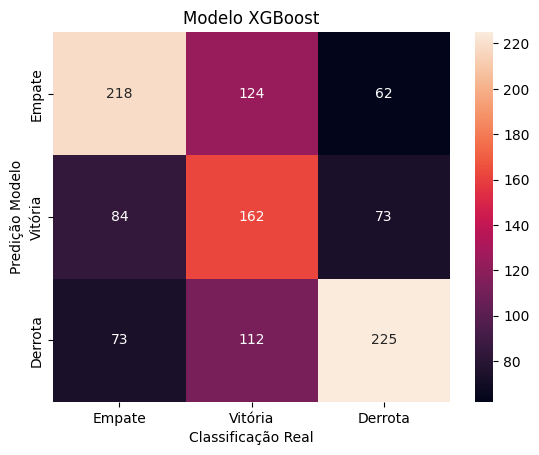

In [53]:
#imprimir a Matriz de Confusão para XGBoost
XGB_model_bal_otm_pred = XGB_model_bal_otm_loaded.predict(X_test_bal)

XGB_model_bal_otm_cm = metrics.confusion_matrix(XGB_model_bal_otm_pred, y_test_bal)

sns.heatmap(XGB_model_bal_otm_cm,
            annot=True,
            fmt='.0f',
            xticklabels = ["Empate", "Vitória", "Derrota"] ,
            yticklabels = ["Empate", "Vitória", "Derrota"]
            )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo XGBoost')

In [54]:
#type(mlp_cm)
type(XGB_model_bal_otm_cm)

numpy.ndarray

In [55]:
#mlp_cm
confusion_matrix = XGB_model_bal_otm_cm
confusion_matrix

array([[218, 124,  62],
       [ 84, 162,  73],
       [ 73, 112, 225]])

In [56]:
# Cálculo da precisão por classe
precision_classes = []
for i in range(3):
    precision_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]))

# Impressão dos resultados
print("Precisão por classe:")
print(f"Empate : {precision_classes[0]:.4f}")
print(f"Vitória: {precision_classes[1]:.4f}")
print(f"Derrota: {precision_classes[2]:.4f}")

# f"Valor: {valor:.4f}"

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.

Precisão por classe:
Empate : 0.5813
Vitória: 0.4070
Derrota: 0.6250
Precisão geral: 0.5339805825242718


In [57]:
# Cálculo do recall por classe
recall_classes = []
for i in range(3):
    recall_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]))

# Impressão dos resultados
print("Recall por classe:")
print(f"Empate : {recall_classes[0]:.4f}")
print(f"Vitória: {recall_classes[1]:.4f}")
print(f"Derrota: {recall_classes[2]:.4f}")

#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.

Recall por classe:
Empate : 0.5396
Vitória: 0.5078
Derrota: 0.5488


In [58]:
# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

Acurácia: 0.5339805825242718


In [59]:
# Cálculo do F1-score por classe
f1_classes = []
for i in range(3):
    precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
    recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
    f1_classes.append(2 * (precision * recall) / (precision + recall))

# Impressão dos resultados
print("F1-score por classe:")
print(f"Empate : {f1_classes[0]:.4f}")
print(f"Vitória: {f1_classes[1]:.4f}")
print(f"Derrota: {f1_classes[2]:.4f}")

# Cálculo do F1-score geral
f1_geral = np.mean(f1_classes)

# Impressão do resultado
print("F1-score geral:", f1_geral)

# F1-score = 2 * (Precisão * Recall) / (Precisão + Recall)
# O F1-score é uma métrica que combina precisão e recall em uma única medida,
# sendo útil para avaliar o desempenho do modelo em problemas de classificação
# com múltiplas classes.

F1-score por classe:
Empate : 0.5597
Vitória: 0.4519
Derrota: 0.5844
F1-score geral: 0.5319967807708231


In [ ]:
# Gradient Boosting (por exemplo, XGBoost, LightGBM, CatBoost)

In [ ]:
XGB_model_bal_otm.best_estimator_.feature_importances_

array([0.2492971 , 0.25280944, 0.24387386, 0.25401968], dtype=float32)